In [ ]:
!pip install scikit-plot

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import sklearn.datasets as dt
import scikitplot as skplt

In [2]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
import keras
import tensorflow as tf
from keras.datasets import mnist

In [4]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import SpectralEmbedding, TSNE, locally_linear_embedding, MDS

from sklearn import metrics

from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score,ConfusionMatrixDisplay

In [5]:
import colorcet as cc
import matplotlib.colors as colors

# Machine learning : Imágenes de dígitos

En este problema se empleó la base de datos MNIST la cual es una enorme base de datos de dígitos escritos manualmente, de dígitos de 28×28 píxeles. En este ejercicio se implementarán métodos de clasificación para los 10 dígitos representados en las imágenes.

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
img_width = img_height = x_train[0].shape[0]
X_train = x_train.reshape(x_train.shape[0], img_width*img_height)/255
X_test = x_test.reshape(x_test.shape[0], img_width*img_height)/255

In [8]:
scaler = StandardScaler(with_mean=True,with_std=True)
X_std = scaler.fit_transform(X_train)

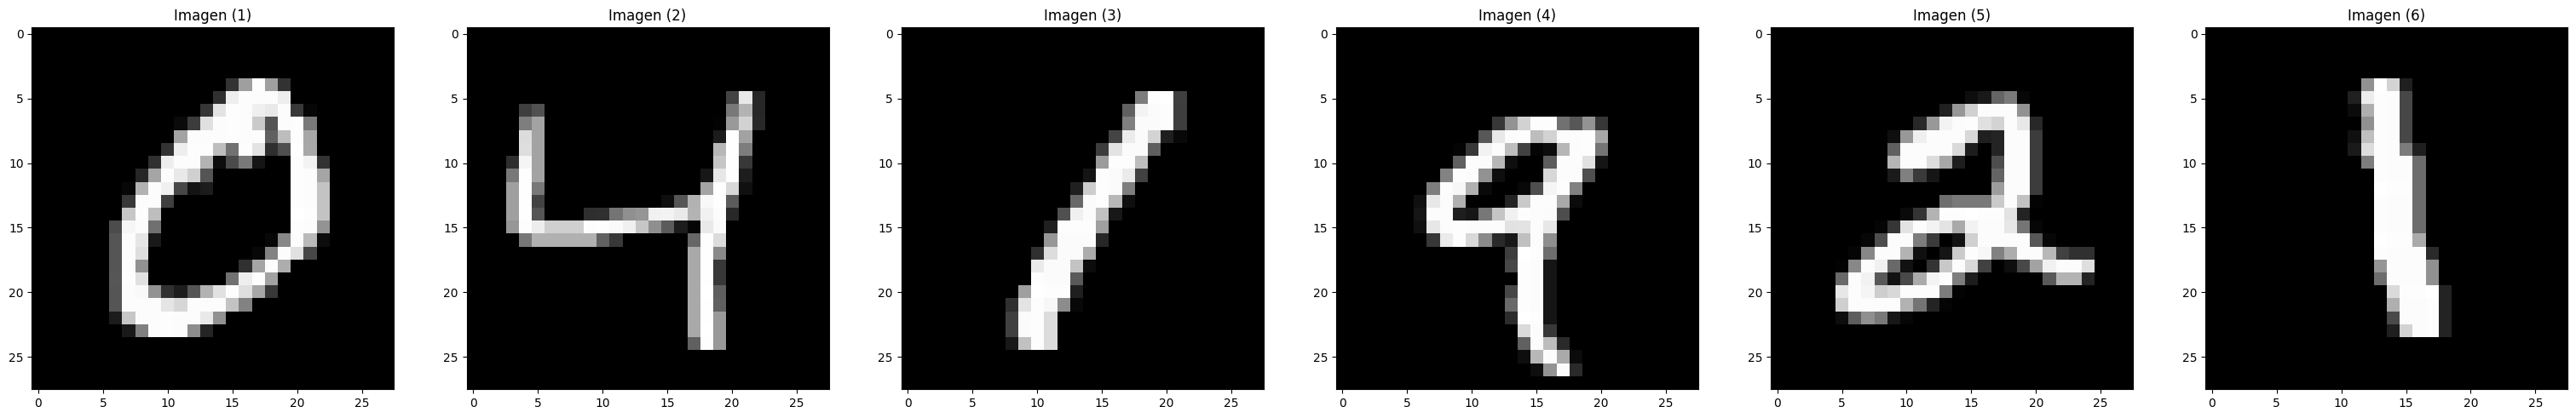

In [10]:
imgs = []

for i in range(6):
    imgs.append(X_train[i+1].reshape((28,28)))

show_images(imgs,2)
plt.show()

In [14]:
pca = PCA(n_components=2)
result = pca.fit_transform(X_std)
proj = pd.DataFrame(result,columns = ['pc1','pc2'])

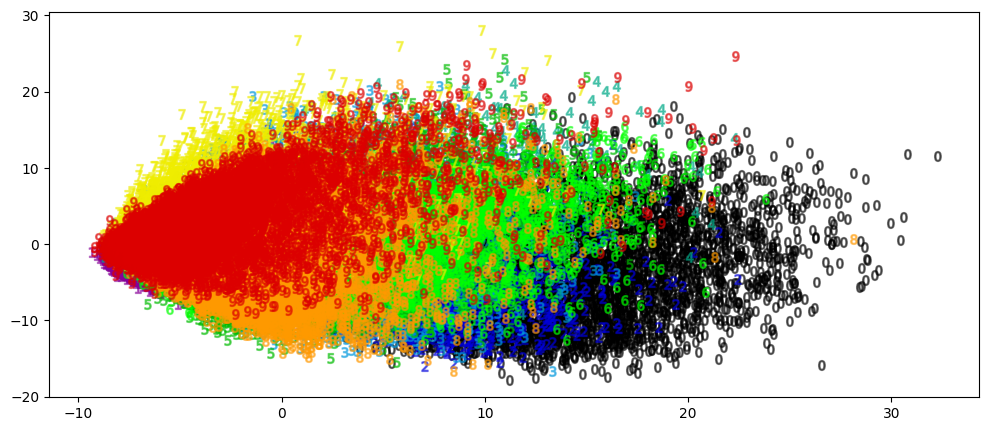

In [17]:
plt.figure(figsize = (12,5))
for i in range(0,10):
        plt.scatter(x=proj['pc1'][y_train == i],y=proj['pc2'][y_train == i],marker=f"${i}$" ,s=50,c=plt.cm.nipy_spectral(i / 10),alpha=0.5)

## Regresión logística

En regresión logística, modelamos linealmente el logaritmo de los momios (odds ratio) de las probabilidades posteriores respecto a una probabilidad de referencia:
$$P(y = k|x) = \frac{e^{\beta_{k0}+\beta_k'x}}{1+\sum_{i=1}^{K-1}e^{\beta_{i0}+\beta_i'x}}\;\;i=1,2,\dots,K-1$$
$$P(y = K|x) = \frac{1}{1+\sum_{i=1}^{K-1}e^{\beta_{i0}+\beta_i'x}}\;\;i=1,2,\dots,K-1$$

Para finalizar, ajustamos un modelo de Regresión logística con un número máximo de 100 iteraciones, un random\_state= 20, la tolerancia se dejo con su parámetro de default y un solver de "newton-cg" porque nuestro problema es de multiples clase. Además, se estableció a multi\_class=‘multinomial’ para emplear la función de pérdida de entropía cruzada. La matriz de confusión muestra un gran ajuste con este metodo dado que los elementos fuera de la diagonal son pequeños

Text(0, 0.5, 'Clase predecida')

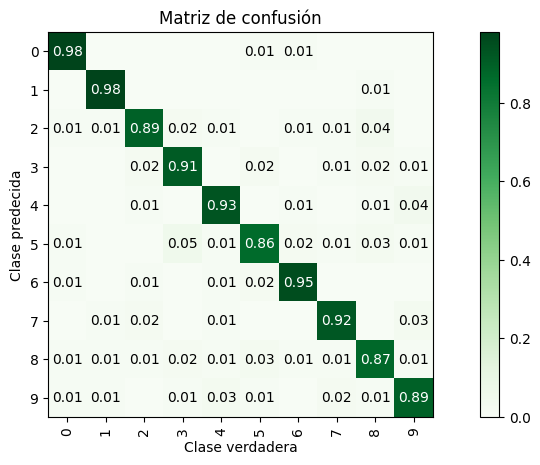

In [ ]:
reg = LogisticRegression(fit_intercept=True,random_state=0, multi_class='ovr').fit(X_train, y_train)
y_pred=reg.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,normalize=True,
                                    title="Matriz de confusión",cmap="Greens",hide_zeros=True,figsize=(12,5));
plt.xticks(rotation=90);
plt.xlabel("Clase verdadera")
plt.ylabel("Clase predecida")

## Análisis de discriminante lineal (LDA)

En este método se considera que nuestros datos provienen de una distribución normal con varianzas iguales:
$$X|y_i \sim N(\mu_i, \Sigma)$$

Las funciones discriminantes, o en general, el clasificador induce fronteras de clasificación lineales. Esas fronteras son aquellas donde las probabilidades posteriores son iguales.

Al aplicar el método LDA se escogio como solver la descomposición de valores propios por el gran número de atributos de cada observación y se definio al parámetro store\_covariance como verdadero para calcular la matriz dentro de las clases, mientras que la tolerancia se dejo con su valor por default.
A continuación se muestran los resultados de este método por medio de la matriz de confusión.

Text(0, 0.5, 'Clase predecida')

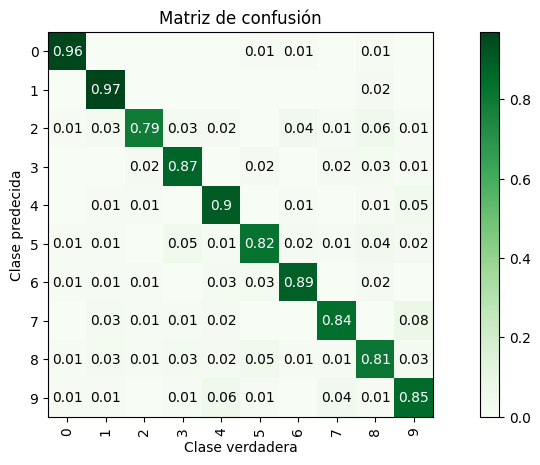

In [ ]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
#Ajuste del modelo para clasificar
y_pred = lda.fit(X_train, y_train).predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred,normalize=True,
                                    title="Matriz de confusión",cmap="Greens",hide_zeros=True,figsize=(12,5));
plt.xticks(rotation=90);
plt.xlabel("Clase verdadera")
plt.ylabel("Clase predecida")

## Análisis de discriminante cuadrático (QDA)

Este es método analoga a LDA, en el  cual se considera que
nuestros datos provienen de una distribución normal pero con varianzas arbitarias:
$$X|y_i \sim N(\mu_i, \Sigma_i)$$

Para el análisis de QDA se definio al parámetro store\_covariance como verdadero para calcular la matriz dentro de las clases, mientras que la tolerancia y el parámetro de regularización se usaron con su valor por default. Al aplicar a nuestro conjunto de prueba QDA obtuvimos la siguiente matriz de confusión.

Text(0, 0.5, 'Clase predecida')

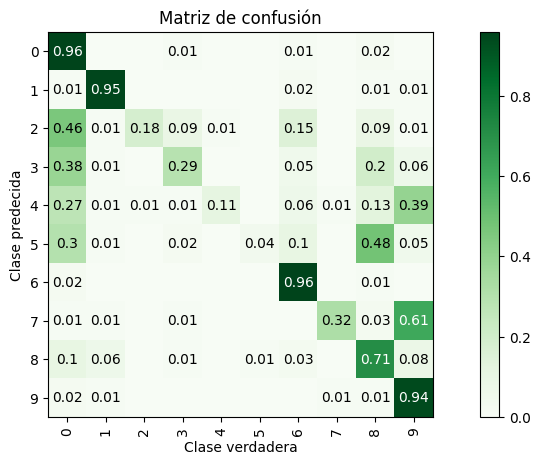

In [ ]:
# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
#Ajuste del modelo para clasificar
y_pred = qda.fit(X_train, y_train).predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred,normalize=True,
                                    title="Matriz de confusión",cmap="Greens",hide_zeros=True,figsize=(12,5));
plt.xticks(rotation=90);
plt.xlabel("Clase verdadera")
plt.ylabel("Clase predecida")

# Reconocimiento facial con redes neuronales

En esta ocasión utilizamo el conjunto de datos Labelled Faces in
the Wild (LFW), que consiste en fotografías de rostros recolectados de
internet y contenido en sklearn ara preprocesar los datos de reconocimiento facial. En este estudio se va a considerar solo aquellas personas que tienen al menos 70 fotografías de su rostro, también, vamos a considerar el tamaño original de la imagen (125 x 94). Por lo tanto, nos aseguramos de que nuestro modelo tenga datos adecuados para aprender. Además, esto reduce el peligro de sobreajuste.

Esta consulta tiene como resultado un conjunto de 1288 imágenes que pertenecen a algunas personas. Las 1288 imágenes de nuestra consulta pertenecen a 7 distintas personas.
- Ariel Sharon
- Colin Powell
- Donald Rumsfeld
- George W Bush
- Gerhard Schroeder
- Hugo Chavez
- Tony Blair


In [ ]:
from sklearn.datasets import fetch_lfw_people

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person = 60)
X = lfw_people.data
Y = lfw_people.target

target_names = lfw_people.target_names

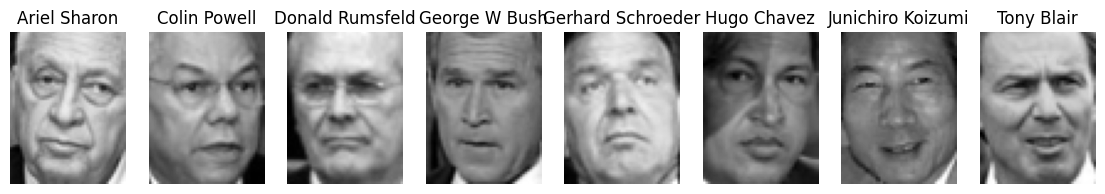

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(181), plt.imshow(np.reshape(X[Y==0][0],(62,47)), cmap=plt.cm.gray), plt.axis('off'), plt.title(lfw_people.target_names[0])
plt.subplot(182), plt.imshow(np.reshape(X[Y==1][0],(62,47)), cmap=plt.cm.gray), plt.axis('off'), plt.title(lfw_people.target_names[1])
plt.subplot(183), plt.imshow(np.reshape(X[Y==2][0],(62,47)), cmap=plt.cm.gray), plt.axis('off'), plt.title(lfw_people.target_names[2])
plt.subplot(184), plt.imshow(np.reshape(X[Y==3][0],(62,47)), cmap=plt.cm.gray), plt.axis('off'), plt.title(lfw_people.target_names[3])
plt.subplot(185), plt.imshow(np.reshape(X[Y==4][0],(62,47)), cmap=plt.cm.gray), plt.axis('off'), plt.title(lfw_people.target_names[4])
plt.subplot(186), plt.imshow(np.reshape(X[Y==5][0],(62,47)), cmap=plt.cm.gray), plt.axis('off'), plt.title(lfw_people.target_names[5])
plt.subplot(187), plt.imshow(np.reshape(X[Y==6][0],(62,47)), cmap=plt.cm.gray), plt.axis('off'), plt.title(lfw_people.target_names[6])
plt.subplot(188), plt.imshow(np.reshape(X[Y==7][0],(62,47)), cmap=plt.cm.gray), plt.axis('off'), plt.title(lfw_people.target_names[7])
plt.show()

In [ ]:
lab = lfw_people.target_names[Y]
color_map = np.array([colors.rgb2hex(cc.glasbey_bw[i]) for i in Y])
mark = np.array(['o','<','^','+','s','d','*','>'])

El primer paso en nuestro estudio se basó en estandarizar cada una de las imágenes de nuestro base de datos. En la siguiente figura se muestra la representación de la media y una desviación estándar del conjunto de datos de estudios donde cada píxel de la imagen se trabajó como una variable (las medidas se obtuvieron por columnas).

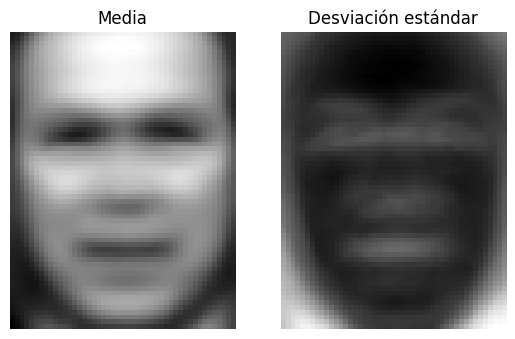

In [ ]:
scaler = StandardScaler(with_mean=True,with_std=True)
faces_scale = scaler.fit_transform(X)
mean_face = np.reshape(scaler.mean_, (62,47))
sd_face = np.reshape(np.sqrt(scaler.var_), (62,47))
plt.subplot(121), plt.imshow(mean_face, cmap=plt.cm.gray), plt.axis('off'), plt.title('Media')
plt.subplot(122), plt.imshow(sd_face, cmap=plt.cm.gray), plt.axis('off'), plt.title('Desviación estándar')
plt.show()

n este paso, dividimos nuestro conjunto de datos de reconocimiento facial en dos mitades utilizando el método de división de prueba de tren de la selección de sklearn.model. El objetivo de esta división es evaluar el rendimiento de nuestro modelo después del entrenamiento.

La función de división de prueba de tren acepta como entradas los datos X y las etiquetas y. Y los divide en conjuntos de entrenamiento y prueba. Seleccionamos test size=0.2 en este ejemplo. Esto implica que el 20 % de los datos se utilizará como conjunto de prueba y el 80 % como conjunto de entrenamiento. Además, usamos estado aleatorio = 42 para garantizar que los datos se dividan de manera consistente cada vez que se ejecuta el código.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

ueremos identificar al individuo cuyo rostro aparece en una imagen. En este caso, utilizaremos una red totalmente conectada, a menudo conocida como red densa. Es una red neuronal artificial que se utilizó para crear el modelo.

Las redes neuronales artificiales se modelan según el funcionamiento y la organización del cerebro humano. Están formados por nodos de procesamiento de información o neuronas que están conectadas. Cada neurona de una capa en una red densa está vinculada a cada neurona de la capa superior.

El modelo tiene cuatro capas en este código. Para pasar a la siguiente capa, los datos de entrada se aplanan en la primera capa en una matriz unidimensional. Las neuronas 128 y 64 de las dos capas siguientes, por consiguiente, están completamente unidas.

La función de activación ReLU es una función de activación única utilizada por estas capas. Con eso, podemos hacer que el modelo aprenda correlaciones no lineales entre las entradas y salidas. La última capa emplea la función de activación softmax para hacer predicciones. Y es una capa completamente conectada con tantas neuronas como clases potenciales.

In [ ]:
model = tf.keras.models.Sequential([

tf.keras.layers.Flatten(input_shape=(62 * 47,)),

tf.keras.layers.Dense(128, activation='relu'),

tf.keras.layers.Dense(64, activation='relu'),

tf.keras.layers.Dense(len(target_names), activation='softmax')

])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
34/34 [==============================] - 2s 4ms/step - loss: 1.8216 - accuracy: 0.3998
Epoch 2/10
34/34 [==============================] - 0s 3ms/step - loss: 1.6340 - accuracy: 0.4471
Epoch 3/10
34/34 [==============================] - 0s 3ms/step - loss: 1.5245 - accuracy: 0.4620
Epoch 4/10
34/34 [==============================] - 0s 4ms/step - loss: 1.3251 - accuracy: 0.5380
Epoch 5/10
34/34 [==============================] - 0s 4ms/step - loss: 1.2779 - accuracy: 0.5547
Epoch 6/10
34/34 [==============================] - 0s 3ms/step - loss: 1.1409 - accuracy: 0.5965
Epoch 7/10
34/34 [==============================] - 0s 3ms/step - loss: 1.0846 - accuracy: 0.6224
Epoch 8/10
34/34 [==============================] - 0s 4ms/step - loss: 1.0176 - accuracy: 0.6327
Epoch 9/10
34/34 [==============================] - 0s 3ms/step - loss: 0.9670 - accuracy: 0.6735
Epoch 10/10
34/34 [==============================] - 0s 4ms/step - loss: 0.8344 - accuracy: 0.7273


Ahora, necesitamos evaluar el modelo entrenado en los datos de prueba. Utilizamos la pérdida de prueba y la precisión de la prueba para evaluar el rendimiento del modelo. En la prueba de datos de prueba X y las etiquetas de prueba y prueba, necesitamos llamar a "la función model.evaluate"

La función genera la precisión de la prueba y la pérdida de la prueba. Las variables pérdida de prueba y precisión de prueba, respectivamente, contienen estos valores. Finalmente, usamos la función "imprimir" para generar la precisión de la prueba.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 0.9949 - accuracy: 0.6704


In [ ]:
predictions = model.predict(X_test)

predicted_classes = [target_names[np.argmax(prediction)] for prediction in predictions]

9/9 [==============================] - 0s 3ms/step


In [ ]:
import scikitplot as skplt

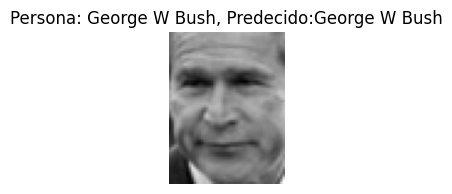

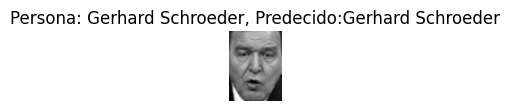

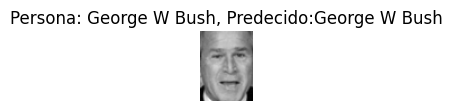

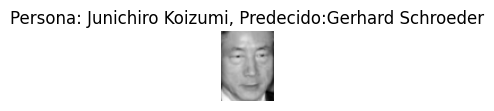

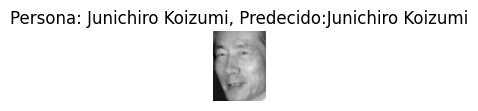

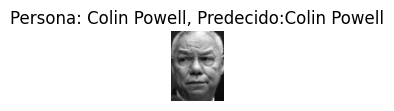

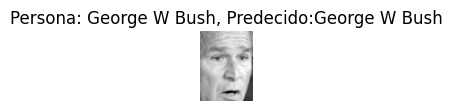

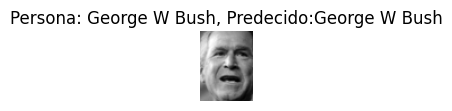

In [ ]:
plt.figure(figsize=(14,5))
for i in range(8):
  plt.subplot(181+i), plt.imshow(X_test[i].reshape(62, 47), cmap='gray'), plt.axis('off'), plt.title(f"Persona: {target_names[y_test[i]]}, Predecido:{predicted_classes[i]}")
  plt.show()

Text(0, 0.5, 'Clase predecida')

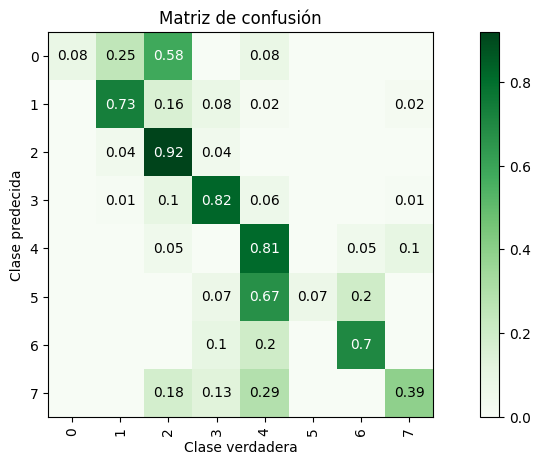

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, [np.argmax(prediction) for prediction in predictions],normalize=True,
                                    title="Matriz de confusión",cmap="Greens",hide_zeros=True,figsize=(12,5));
plt.xticks(rotation=90);
plt.xlabel("Clase verdadera")
plt.ylabel("Clase predecida")